In [105]:
import pandas as pd
import plotly.express as px
import tsfresh as tsf
from tsfresh import extract_features, select_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction.settings import MinimalFCParameters
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_selection.relevance import calculate_relevance_table




import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from pathlib import Path
base_dir = Path()

##

In [ ]:
base_dir = Path().resolve().parent/'Ventas_.csv'
df = pd.read_csv(base_dir,index_col=None, parse_dates=['Fecha'] )
df = df[df['Ventas'] != 0].copy()
df['Estado'] = df['Estado'].astype('category')
df = df.sort_values(by=['Fecha','Estado','Ventas'])

PosixPath('/home/mikez/ds/Ventas_.csv')

In [ ]:
df['año'] = df['Fecha'].dt.year
df['mes'] = df['Fecha'].dt.month
df['día_semana'] = df['Fecha'].dt.day_name()
df['semana'] = df['Fecha'].dt.isocalendar().week
df['mes_nombre'] = df['Fecha'].dt.month_name()


,Estado,Ventas
Fecha,,
2023-03-01,Aguascalientes,862.80
2023-03-01,Baja California,89486.76
2023-03-01,Baja California,3431.28
2023-03-01,Baja California,567135.64
2023-03-01,Baja California Sur,7419.52


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20079 entries, 2023-03-01 to 2025-04-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Estado  20079 non-null  object 
 1   Ventas  20079 non-null  float64
dtypes: float64(1), object(1)
memory usage: 470.6+ KB


In [9]:
df.head()

,Fecha,Estado,Ventas
0,2023-03-01,Aguascalientes,862.80
1,2023-03-01,Baja California,89486.76
2,2023-03-01,Baja California,3431.28
3,2023-03-01,Baja California,567135.64
4,2023-03-01,Baja California Sur,7419.52


In [28]:
df.size

60237

In [44]:
df = df[df['Ventas'] != 0].copy()

In [46]:
df.size

50364

In [47]:
60237-50364

9873

In [48]:
df.duplicated().sum()

np.int64(1455)

In [49]:
du = df[df.duplicated()]


In [50]:
df[df.duplicated(keep=False)].value_counts()

Fecha       Estado        Ventas 
2023-12-01  Mexico State  822.99     9
2023-04-01  Guanajuato    750.57     8
            Jalisco       1547.15    8
2023-03-01  Mexico State  750.57     8
2023-10-01  Guanajuato    1771.00    8
                                    ..
2023-12-01  Sinaloa       6415.62    2
            Tabasco       1864.21    2
            Tamaulipas    2687.20    2
            Veracruz      822.99     2
            Michoacan     2687.20    2
Name: count, Length: 920, dtype: int64

# Estado

In [39]:
df['Estado'] = df['Estado'].astype('category')

In [57]:
df.head()

,Fecha,Estado,Ventas
272,2023-03-01,Aguascalientes,750.57
0,2023-03-01,Aguascalientes,862.80
270,2023-03-01,Aguascalientes,1629.08
269,2023-03-01,Aguascalientes,3002.28
271,2023-03-01,Aguascalientes,4008.73


In [56]:
df = df.sort_values(by=['Fecha','Estado','Ventas'])


In [51]:
df.Estado.value_counts()

Estado
Mexico State           1832
Jalisco                1192
Mexico City            1156
Veracruz               1053
Guanajuato              984
Nuevo Leon              920
Michoacan               750
Puebla                  679
Tamaulipas              574
Chiapas                 516
Sonora                  490
Hidalgo                 481
Guerrero                479
Coahuila                463
Oaxaca                  425
Sinaloa                 420
Queretaro               404
Baja California         389
Tabasco                 369
Chihuahua               353
Morelos                 352
San Luis Potosi         333
Zacatecas               311
Nayarit                 285
Quintana Roo            261
Durango                 237
Yucatan                 229
Tlaxcala                207
Baja California Sur     183
Aguascalientes          174
Campeche                162
Colima                  125
Name: count, dtype: int64

# FECHAS ANA

In [58]:
df.Fecha = pd.to_datetime(df.Fecha, format='%Y-%m-%d')
#print(df.Fecha.isna().sum())
print(df['Fecha'].min(), df['Fecha'].max())
dff = df[['Fecha']].copy()

2023-03-01 00:00:00 2025-04-01 00:00:00


In [59]:
dff['año'] = dff['Fecha'].dt.year
dff['mes'] = dff['Fecha'].dt.month
dff['día_semana'] = dff['Fecha'].dt.day_name()
dff['semana'] = dff['Fecha'].dt.isocalendar().week
dff['mes_nombre'] = dff['Fecha'].dt.month_name()
dff['es_fin_de_semana'] = dff['Fecha'].dt.dayofweek >= 5

In [ ]:
dff.columns

Index(['Fecha', 'año', 'mes', 'día_semana', 'semana', 'mes_nombre',
       'es_fin_de_semana'],
      dtype='object')

In [60]:
dff.groupby('año').size()

año
2023    6079
2024    8034
2025    2675
dtype: int64

### agregado de los 3 años
Ver el agregado total nos puede sesgar  
Hay que considerar la falta de la info de ciertos meses 

In [66]:
monthly_total_freq = dff.groupby('mes').size()
monthly_total_freq = monthly_total_freq.reindex(range(1, 13), fill_value=0)
monthly_total_freq

mes
1     1398
2     1351
3     1912
4     1882
5     1268
6     1196
7     1152
8     1190
9     1277
10    1370
11    1447
12    1345
dtype: int64

In [64]:
weekly_total_freq = dff.groupby('semana').size()
weekly_total_freq = weekly_total_freq.reindex(range(1, 54), fill_value=0)
weekly_total_freq

semana
1     1398
2        0
3        0
4        0
5     1351
6        0
7        0
8        0
9     1912
10       0
11       0
12       0
13     564
14    1318
15       0
16       0
17       0
18    1268
19       0
20       0
21       0
22    1196
23       0
24       0
25       0
26     551
27     601
28       0
29       0
30       0
31    1190
32       0
33       0
34       0
35    1277
36       0
37       0
38       0
39     646
40     724
41       0
42       0
43       0
44    1447
45       0
46       0
47       0
48    1345
49       0
50       0
51       0
52       0
53       0
dtype: int64

In [62]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [61]:
daily_total_freq =dff.groupby('día_semana').size().reindex(orden_dias).fillna(0)
daily_total_freq

día_semana
Monday       2563
Tuesday      1967
Wednesday    2655
Thursday     1893
Friday       2652
Saturday     3054
Sunday       2004
dtype: int64

In [78]:
#weekly_total_freq.plot(kind='bar', figsize=(10, 5), title='Weekly Total Frequency')
#daily_total_freq.plot(kind='line', figsize=(10, 5), title='Daily Total Frequency')
#monthly_total_freq.plot(kind='line', figsize=(10, 5), title='Monthly Total Frequency')

fig = px.bar(weekly_total_freq, x=weekly_total_freq.index, y=weekly_total_freq.values, title='Weekly Sales by Year')
fig.update_layout(xaxis_title='Week', yaxis_title='Sales')


fig = px.line(daily_total_freq, x=daily_total_freq.index, y=daily_total_freq.values, title='Daily Sales by Year')
fig.update_layout(xaxis_title='Day of Week', yaxis_title='Sales')
#fig.show()
fig = px.line(monthly_total_freq, x=monthly_total_freq.index, y=monthly_total_freq.values, title='Monthly Sales by Year')
fig.update_layout(xaxis_title='Month', yaxis_title='Sales')
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'mes=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'AQIDBAUGBwgJCgsM', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'dgVHBXgHWgf0BKwEgASmBP0EWgWnBUEF', 'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Monthly Sales by Year'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Month'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sales'}}}
})

# Comparativos 
1. year vs month


In [79]:
#**Año vs mes**
year_vs_m = dff.groupby(['año', 'mes_nombre']).size().unstack().reindex(columns= orden_meses).fillna(0).astype(int)
year_vs_m

mes_nombre,January,February,March,April,May,June,July,August,September,October,November,December
año,,,,,,,,,,,,
2023,0,0,598,564,604,574,551,577,607,646,701,657
2024,706,706,642,652,664,622,601,613,670,724,746,688
2025,692,645,672,666,0,0,0,0,0,0,0,0


In [ ]:
dff.columns

Index(['Fecha', 'año', 'mes', 'día_semana', 'semana', 'mes_nombre',
       'es_fin_de_semana'],
      dtype='object')

In [ ]:
day_vs_m_by_year = (
    dff.groupby(['año', 'mes_nombre', 'día_semana'])
       .size()
)
day_vs_m_by_year

año   mes_nombre  día_semana
2023  April       Saturday      674
      August      Tuesday       726
      December    Friday        804
      July        Saturday      725
      June        Thursday      746
      March       Wednesday     708
      May         Monday        729
      November    Wednesday     839
      October     Sunday        790
      September   Friday        750
2024  April       Monday        755
      August      Thursday      738
      December    Sunday        822
      February    Thursday      817
      January     Monday        810
      July        Monday        707
      June        Saturday      748
      March       Friday        762
      May         Wednesday     790
      November    Friday        859
      October     Tuesday       818
      September   Sunday        780
2025  April       Tuesday       779
      February    Saturday      805
      January     Wednesday     809
      March       Saturday      789
dtype: int64

## pivot

In [85]:
dff

,Fecha,año,mes,día_semana,semana,mes_nombre,es_fin_de_semana
272,2023-03-01,2023,3,Wednesday,9,March,False
0,2023-03-01,2023,3,Wednesday,9,March,False
270,2023-03-01,2023,3,Wednesday,9,March,False
269,2023-03-01,2023,3,Wednesday,9,March,False
271,2023-03-01,2023,3,Wednesday,9,March,False
...,...,...,...,...,...,...,...
20073,2025-04-01,2025,4,Tuesday,14,April,False
20078,2025-04-01,2025,4,Tuesday,14,April,False
19646,2025-04-01,2025,4,Tuesday,14,April,False
19403,2025-04-01,2025,4,Tuesday,14,April,False


In [89]:
dff.columns

Index(['Fecha', 'año', 'mes', 'día_semana', 'semana', 'mes_nombre',
       'es_fin_de_semana'],
      dtype='object')

<Axes: title={'center': 'Monthly Sales Distribution'}, xlabel='mes_nombre'>

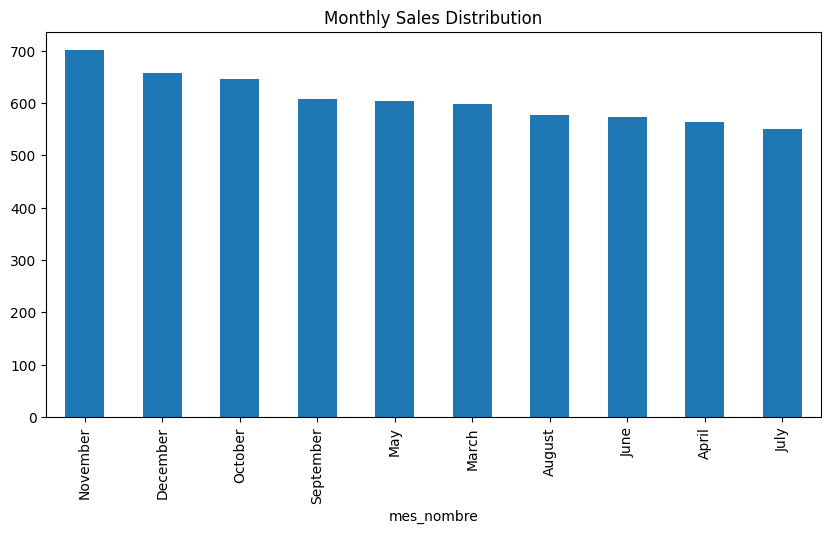

In [98]:
dff3.mes_nombre.value_counts().plot(kind='bar', figsize=(10, 5), title='Monthly Sales Distribution')

In [82]:
pivot_frecuencia = pd.pivot_table(
    data=dff,
    index=['mes_nombre','día_semana'],           
    columns='año',           
    aggfunc='size',                 # conteo de registros
    fill_value=None                    # sin NaNs
).reindex(orden_meses, level='mes_nombre')

pivot_frecuencia


año                     2023   2024   2025
mes_nombre día_semana                     
January    Monday        NaN  706.0    NaN
           Wednesday     NaN    NaN  692.0
February   Saturday      NaN    NaN  645.0
           Thursday      NaN  706.0    NaN
March      Friday        NaN  642.0    NaN
           Saturday      NaN    NaN  672.0
           Wednesday   598.0    NaN    NaN
April      Monday        NaN  652.0    NaN
           Saturday    564.0    NaN    NaN
           Tuesday       NaN    NaN  666.0
May        Monday      604.0    NaN    NaN
           Wednesday     NaN  664.0    NaN
June       Saturday      NaN  622.0    NaN
           Thursday    574.0    NaN    NaN
July       Monday        NaN  601.0    NaN
           Saturday    551.0    NaN    NaN
August     Thursday      NaN  613.0    NaN
           Tuesday     577.0    NaN    NaN
September  Friday      607.0    NaN    NaN
           Sunday        NaN  670.0    NaN
October    Sunday      646.0    NaN    NaN
           Tuesday       NaN  724.0    NaN
November   Friday        NaN  746.0    NaN
           Wednesday   701.0    NaN    NaN
December   Friday      657.0    NaN    NaN
           Sunday        NaN  688.0    NaN

In [ ]:
df_c = df.copy()
df_c['mes'] = df_c['Fecha'].dt.month
df_c['año'] = df_c['Fecha'].dt.year
df_c['week'] = df_c['Fecha'].dt.isocalendar().week

df_c['Ventas'] = df_c['Ventas'].astype(float)
tsf



In [101]:
df_c

,Fecha,Estado,Ventas,mes,año
272,2023-03-01,Aguascalientes,750.57,3,2023
0,2023-03-01,Aguascalientes,862.80,3,2023
270,2023-03-01,Aguascalientes,1629.08,3,2023
269,2023-03-01,Aguascalientes,3002.28,3,2023
271,2023-03-01,Aguascalientes,4008.73,3,2023
...,...,...,...,...,...
20073,2025-04-01,Zacatecas,15620.63,4,2025
20078,2025-04-01,Zacatecas,28760.10,4,2025
19646,2025-04-01,Zacatecas,56704.00,4,2025
19403,2025-04-01,Zacatecas,108611.27,4,2025


In [99]:
dff.to_csv(base_dir.parent/'total_v.csv', index=False)

In [26]:
a = dff[(dff['año'] == 2023) & (dff['mes_nombre'] == 'July')]
a.duplicated().sum()

np.int64(724)

In [ ]:
dff[ddf['año'] == 2023 and dff['mes_nombre'] == 'July'].head()

In [ ]:
dff[ddf['año'] == 2023 and dff['mes_nombre'] == 'July'].head()

día_semana       Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
año  mes_nombre                                                           
2023 April            0        0          0         0       0       674   
     August           0      726          0         0       0         0   
     December         0        0          0         0     804         0   
     July             0        0          0         0       0       725   
     June             0        0          0       746       0         0   
     March            0        0        708         0       0         0   
     May            729        0          0         0       0         0   
     November         0        0        839         0       0         0   
     October          0        0          0         0       0         0   
     September        0        0          0         0     750         0   
2024 April          755        0          0         0       0         0   
     August           0        0          0       738       0         0   
     December         0        0          0         0       0         0   
     February         0        0          0       817       0         0   
     January        810        0          0         0       0         0   
     July           707        0          0         0       0         0   
     June             0        0          0         0       0       748   
     March            0        0          0         0     762         0   
     May              0        0        790         0       0         0   
     November         0        0          0         0     859         0   
     October          0      818          0         0       0         0   
     September        0        0          0         0       0         0   
2025 April            0      779          0         0       0         0   
     February         0        0          0         0       0       805   
     January          0        0        809         0       0         0   
     March            0        0          0         0       0       789   

día_semana       Sunday  
año  mes_nombre          
2023 April            0  
     August           0  
     December         0  
     July             0  
     June             0  
     March            0  
     May              0  
     November         0  
     October        790  
     September        0  
2024 April            0  
     August           0  
     December       822  
     February         0  
     January          0  
     July             0  
     June             0  
     March            0  
     May              0  
     November         0  
     October          0  
     September      780  
2025 April            0  
     February         0  
     January          0  
     March            0

# Estrato 2023   
mismo analisis pero estratificado por año


In [92]:
dff3 = dff[dff['año'] == 2023]
dff4 = dff[dff['año'] == 2024]
dff5 = dff[dff['año'] == 2025]


In [ ]:
# mismo analisis pero estratificado por año
monthly_total_freq = dff3.groupby('mes').size()
monthly_total_freq = monthly_total_freq.reindex(range(1, 13), fill_value=0)
monthly_total_freq

mes
1       0
2       0
3     708
4     674
5     729
6     746
7     725
8     726
9     750
10    790
11    839
12    804
dtype: int64